# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
from reusable import file_loader
from reusable import load
from reusable import preprocessor
import csv
import numpy as np

orig_data = load.load_project_data()
greyscale_data = preprocessor.load_greyscale_train_data()
data = preprocessor.load_preprocessed_data()

orig_X_train, orig_y_train = (orig_data.train.features, orig_data.train.labels)
orig_X_test, orig_y_test = (orig_data.test.features, orig_data.test.labels)

greyscale_X, greyscale_y = (greyscale_data.features, greyscale_data.labels)

X_train, y_train = (data.train.features, data.train.labels)
X_test, y_test = (data.test.features, data.test.labels)

def load_csv_to_dict(csv_file):
  with open(csv_file, mode='r') as infile:
    reader = csv.reader(infile)
    return {rows[0]:rows[1] for rows in reader}
  
sign_dict = load_csv_to_dict("../signnames.csv")

unique, counts = np.unique(orig_y_train, return_counts=True)
unique_grey = np.unique(greyscale_y)
# dict of original images
train_dict = {u: [] for u in unique}
grey_dict = {u: [] for u in unique}

for i in range(len(orig_X_train)):
  train_dict[orig_y_train[i]].append(orig_X_train[i])
  grey_dict[greyscale_y[i]].append(greyscale_X[i])
  
print("Done!")

Loading project data.
traffic-signs-data.zip already downloaded.
Data already unzipped.
Unpickling file train.p.
Unpickling file test.p.
Returning ProjectData(train, test).
Loading pre-preprocessed greyscale data...
Unpickling file train_greyscale_preprocessed.p.
Loading pre-preprocessed data...
Unpickling file train_preprocessed.p.
Unpickling file test_preprocessed.p.
Done!


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.
def data_info(features_train, labels_train, feautures_test, labels_test, name):
  # Number of training examples
  n_train = len(features_train)
  # Number of testing examples.
  n_test = len(labels_train)
  # What's the shape of an traffic sign image?
  image_shape = features_train[0].shape
  # How many unique classes/labels there are in the dataset.
  n_classes = len(set(y_train))
  
  indicies, counts = np.unique(labels_train, return_counts=True)

  print(name, "number of training examples =", n_train)
  print(name, "number of testing examples =", n_test)
  print(name, "image data shape =", image_shape)
  print(name, "number of classes =", n_classes)
  print(name, "min count =", min(counts))
  print(name, "max count =", max(counts))
  
data_info(orig_X_train, orig_y_train, orig_X_test, orig_y_test, "Original")
print()
data_info(X_train, y_train, X_test, y_test, "Jiggered")

Original number of training examples = 39209
Original number of testing examples = 39209
Original image data shape = (32, 32, 3)
Original number of classes = 43
Original min count = 210
Original max count = 2250

Jiggered number of training examples = 96750
Jiggered number of testing examples = 96750
Jiggered image data shape = (32, 32, 1)
Jiggered number of classes = 43
Jiggered min count = 2250
Jiggered max count = 2250


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

def display_images(images, image_name, num_images, greyscale=False):
  print("Class", "`" + image_name + "`", ":", len(images), "samples.")
  fig = plt.figure(figsize = (6, 1))
  fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
  for i in range(num_images):
    axis = fig.add_subplot(1, num_images, i + 1, xticks=[], yticks=[])
    rand_index = random.randint(0, len(images[i]-1))
    if greyscale:
      axis.imshow(images[rand_index].squeeze(), cmap='gray')
    else:
      axis.imshow(images[rand_index].squeeze())
  plt.show()
  print("--------------------------------------------------------------------------------------\n")

print("Only run this for display.")
display = False
if display:
  for k in train_dict.keys():
    display_images(train_dict[k], sign_dict[str(k)], 10)
    display_images(grey_dict[k], sign_dict[str(k)] + " greyscale", 10, greyscale=True)

Only run this for display.


[('Speed limit (20km/h)', 210), ('Dangerous curve to the left', 210), ('Go straight or left', 210), ('Pedestrians', 240), ('End of all speed and passing limits', 240)]
[('Speed limit (50km/h)', 2250), ('Speed limit (30km/h)', 2220), ('Yield', 2160), ('Priority road', 2100), ('Keep right', 2070)]


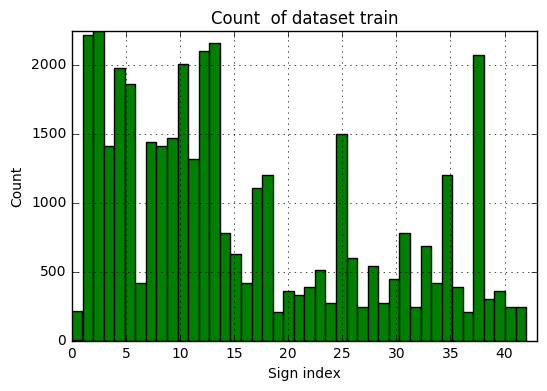

[('Speed limit (20km/h)', 60), ('Dangerous curve to the left', 60), ('Pedestrians', 60), ('End of all speed and passing limits', 60), ('Go straight or left', 60)]
[('Speed limit (50km/h)', 750), ('Speed limit (30km/h)', 720), ('Yield', 720), ('Priority road', 690), ('Keep right', 690)]


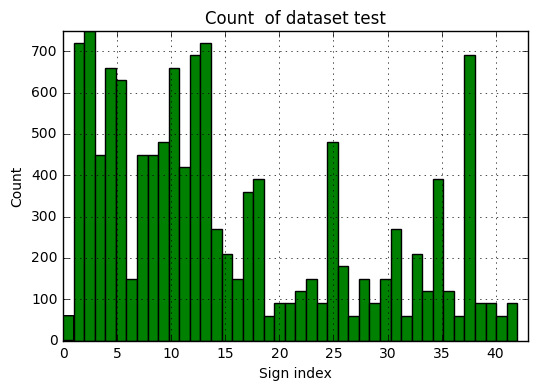

[('Speed limit (20km/h)', 2250), ('Speed limit (30km/h)', 2250), ('Speed limit (50km/h)', 2250), ('Speed limit (60km/h)', 2250), ('Speed limit (70km/h)', 2250)]
[('Speed limit (20km/h)', 2250), ('Speed limit (30km/h)', 2250), ('Speed limit (50km/h)', 2250), ('Speed limit (60km/h)', 2250), ('Speed limit (70km/h)', 2250)]


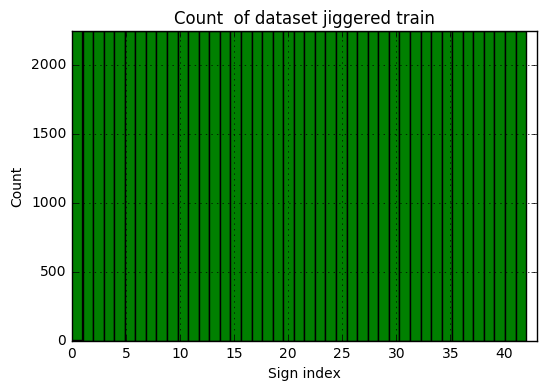

In [4]:
### Count number of each sign in test and train datasets
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

def hist(data, name):
  indicies, counts = np.unique(data, return_counts=True)
  # the histogram of the data
  n, bins, patches = plt.hist(data, len(indicies), facecolor='green')

  plt.xlabel('Sign index')
  plt.ylabel('Count')
  plt.title('Count  of dataset ' + name)
  plt.axis([0, len(indicies), 0, max(counts)])
  plt.grid(True)

  plt.show()
  
def min_counts(data, num_to_print=5):
  indicies, counts = np.unique(data, return_counts=True)
  arr = sorted(list(zip(indicies, counts)), key=lambda x: x[1])
  print([(sign_dict[str(sign[0])], sign[1]) for sign in arr[0:num_to_print]])

def max_counts(data, num_to_print=5):
  indicies, counts = np.unique(data, return_counts=True)
  arr = sorted(list(zip(indicies, counts)), key=lambda x: x[1], reverse=True)
  print([(sign_dict[str(sign[0])], sign[1]) for sign in arr[0:num_to_print]])
  
  
min_counts(orig_y_train)
max_counts(orig_y_train)
hist(orig_y_train, 'train')

min_counts(y_test)
max_counts(y_test)
hist(y_test, 'test')

min_counts(y_train)
max_counts(y_train)
hist(y_train, 'jiggered train')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
#### Preprocess Steps

I have done all my preprocessing in helper files. Preprocessing was taking a long time so I found it easier to save the files as pickles than continue to reload them. My processing steps are:

1. Convert to greyscale
2. Scale between -1 and 1
3. Split out validation data

I converted the images to greyscale because Images had varying levels of brightness and contrast. COnverting to greyscale imporoved the contrast dramatically. I scaled the images between -1 and 1 because it is easier to run the optimization when the data is normally distribuated about 0 with a standard deviation of 1. I decided against using the data points in the csv file to crop the images. In looking at the images, I felt like he images had already been cropped sufficently for a Neural Network. 

In [5]:
print("Resetting data.")
train_pipeline_complete = False
test_pipeline_complete = False

data = preprocessor.load_preprocessed_data()

X_train, y_train = (data.train.features, data.train.labels)
X_test, y_test = (data.test.features, data.test.labels)
print('Done!')

Resetting data.
Loading pre-preprocessed data...
Unpickling file train_preprocessed.p.
Unpickling file test_preprocessed.p.
Done!


In [6]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

### Pipeline. All this does is split data into train and validation.
# Don't run this twice
if train_pipeline_complete == False:
  print("Starting pipeline for training data.")
  X_train, y_train = shuffle(X_train, y_train)
  X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
  train_pipeline_complete = True
  print("Finished pipeline for training data.")
else:
  print("Already preprocessed train data. To re-run, reset previous cell.")

Starting pipeline for training data.
Finished pipeline for training data.


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
When looking at the graphs of the data above, I noticed there were a lot less (10X) of some images than others. I am not sure if this data is reflective of the signs on German roads or not. If it is then it may make sense to actually leave the data as is. It is possible that a data bias will result in the model "guessing" the a more popular sign when it is unsure. Biasing the model toward the most popular sign may not be the best idea. Anther way to bias the model could be by having the most signs for the most important information (Where getting the sign wrong could be the most dangerous, for example). In the end I wasn't sure what if any bias I should/could apply based on the data so I instead decided that there should be equal numbers of all signs. I first did this by limiting the dataset to the smallest number of on individual sign. This made it super fast to train the model but resulted in a low validation accuracy. After reading the Yann Lecunn paper linked above, I realized I could "jigger" the images to create more of them. In general the model shoudl be robuse to different lighting conditions and different angles and different positions in the image. With this in mind, I decided to add additional data points so all signs had the same number of data points. I did this by applying random shifts, rotations and gamma values in a range of values. The range was based on the values used in the LeCunn paper and an eye test. I ended up using the maximum individual sign count as the number of signs but I could also add even more data points by increasing this number and jiggering all sign types. 

Looking at the images, it is hard to tell what is a "jiggered" image and what isn't so I think the jiggered data is within the relm of reason. 

Original number of training examples = 39209
Original number of testing examples = 39209
Original image data shape = (32, 32, 3)
Original number of classes = 43
Original min count = 210
Original max count = 2250

Jiggered number of training examples = 96750
Jiggered number of testing examples = 96750
Jiggered image data shape = (32, 32, 1)
Jiggered number of classes = 43
Jiggered min count = 2250
Jiggered max count = 2250

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
This model is 
* CNN(stride=1, kernal=5, depth=16)
* IncpetionModule(depth=32)
* InceptionModule(depth=64)
* flattened*
* FullyConnected(depth=64) with dropout (0.7)
* FullyConnected(depth=128)
* Out (depth=10)

Based on this [article](https://hacktilldawn.com/2016/09/25/inception-modules-explained-and-implemented/.An), an  inception module is:
* CNN1 = CNN(input, stride=1, kernal=1, depth=final_depth)
* CNN2 = RELU(CNN(input, stride=1, kernal=1, depth=16))
* CNN3 = RELU(CNN(input, stride=1, kernal=1, depth=16))
* CNN4 = CNN(CNN2, string=1, kernal=3, depth=final_depth)
* CNN5 = CNN(CNN3, stride=1, kernal=5, depth=final_depth)
* POOL = MaxPool(input, stride=1, kernal=3)
* CNN6 = CNN(Pool, stride=1, keranl=1, depth=final_depth)
* => RELU(CONCAT(CNN1, CNN4, CNN5, CNN6)

In the LeCunn paper, the author mentions the results for the model got much better after the results from the first 3 layers were combined and flatened before running the fully connected layer. This sound like an eary version of an inception module to me so I decided to take the time to learn how an inception module worked and use it in this project. 


In [7]:
import tensorflow as tf

In [8]:
def fully_connected(input, size):
  weights = tf.get_variable('weights', 
    shape = [input.get_shape()[1], size],
    initializer = tf.contrib.layers.xavier_initializer()
  )
  biases = tf.get_variable('biases',
    shape = [size],
    initializer=tf.constant_initializer(0.0)
  )
  return tf.matmul(input, weights) + biases

  
def fully_connected_relu(input, size):
  return tf.nn.relu(fully_connected(input, size))
  
def conv(input, kernel_size, depth):
  weights = tf.get_variable('weights', 
    shape = [kernel_size, kernel_size, input.get_shape()[3], depth],
    initializer = tf.contrib.layers.xavier_initializer()
  )
  biases = tf.get_variable('biases',
    shape = [depth],
    initializer=tf.constant_initializer(0.0)
  )
  return tf.nn.conv2d(input, weights, strides=[1, 1, 1, 1], padding='SAME') + biases

def conv_relu(input, kernel_size, depth):
  return tf.nn.relu(conv(input, kernel_size, depth))

def pool(input, filter_size, stride_size, padding='SAME'):
  return tf.nn.max_pool(
    input, 
    ksize=[1, filter_size, filter_size, 1], 
    strides=[1, stride_size, stride_size, 1], 
    padding=padding
  )
  
def avg_pool(input, filter_size, stride_size, padding='SAME'):
  return tf.nn.avg_pool(
    input, 
    ksize=[1, filter_size, filter_size, 1], 
    strides=[1, stride_size, stride_size, 1], 
    padding=padding
  )

def inception(input, params):
  with tf.variable_scope(params.name + "_" + "conv_1x1_1"):
    conv_1x1_1 = conv(input, 1, params.final)
  with tf.variable_scope(params.name + "_" + "conv_1x1_2"):
    conv_1x1_2 = conv_relu(input, 1, params.reduce)
  with tf.variable_scope(params.name + "_" + "conv_1x1_3"):
    conv_1x1_3 = conv_relu(input, 1, params.reduce)
    
  with tf.variable_scope(params.name + "_" + "conv_3x3"):
    conv_3x3 = conv(conv_1x1_2, 3, params.final)
  with tf.variable_scope(params.name + "_" + "conv_5x5"):
    conv_5x5 = conv(conv_1x1_3, 5, params.final)
    
  with tf.variable_scope(params.name + "_" + "pool"):
    pool_1 = pool(input, 3, 1)
  with tf.variable_scope(params.name + "_" + "conv_1x1_4"):
    conv_1x1_4 = conv(pool_1, 1, params.final)
    
  return tf.nn.relu(tf.concat(3,[conv_1x1_1, conv_3x3, conv_5x5, conv_1x1_4]))

In [9]:
from tensorflow.contrib.layers import flatten
# 32, 64, 128, 
def model_pass(input, is_training, params):
  # Convolutional layers
  with tf.variable_scope('conv1'):
    conv1 = conv_relu(input, params['conv1'].kernel_size, params['conv1'].depth)
        
  with tf.variable_scope('inception1'):
    inception1 = inception(conv1, params['inception1'])
    
  with tf.variable_scope('inception2'):
    inception2 = inception(inception1, params['inception2'])  
        
  # Flatten convolutional layers output
  fc0 = flatten(inception2)
    
  # Fully connected layers
  with tf.variable_scope('fc1'):
    size = params['fc1'].size
    keep_prob = params['dropout1'].keep_prob
    fc1 = fully_connected_relu(fc0, size=size)
    fc1 = tf.cond(is_training, lambda: tf.nn.dropout(fc1, keep_prob=keep_prob), lambda: fc1)
  with tf.variable_scope('fc2'):
    fc2 = fully_connected_relu(fc1, size=params['fc2'].size)
  with tf.variable_scope('out'):
    size = params['out'].size
    prediction = fully_connected(fc2, size=size)
  return prediction

In [10]:
from reusable.batches import Batch

class ModelParam:
  def __init__(self):
    print('ModelParam.__init__')
    
  def full_param_name(self):
    print('ModelParam.full_param_name')

class ConvParam(ModelParam):
  def __init__(self, name, kernel_size, depth):
    self.name = name
    self.kernel_size = kernel_size
    self.depth = depth
    
  def full_param_name(self):
    return "ck{}cd{}".format(self.kernel_size, self.depth)
  
class InceptionParam(ModelParam):
  def __init__(self, name, final, reduce):
    self.name = name
    self.final = final
    self.reduce = reduce
    
  def full_param_name(self):
    return "id{}ir{}".format(self.final, self.reduce)
  
class PoolParam(ModelParam):
  def __init__(self, name, size):
    self.name = name
    self.size = size
    
  def full_param_name(self):
    return "ps{}".format(self.size)
  
class DropoutParam(ModelParam):
  def __init__(self, name, keep_prob):
    self.name = name
    self.keep_prob = keep_prob
    
  def full_param_name(self):
    return "dp{}".format(self.keep_prob)
  
class FullyConnectedParam(ModelParam):
  def __init__(self, name, size):
    self.name = name
    self.size = size
  def full_param_name(self):
    return "fcd{}".format(self.size)
  
class BaseParam(ModelParam):
  def __init__(self, epochs, rate, batch_size):
    self.epochs = epochs
    self.rate = rate
    self.batch_size = batch_size
    
  def full_param_name(self):
    return "e{}r{}b{}".format(self.epochs, self.rate, self.batch_size)

def model_name(params, param_order):
  return "_".join([params[k].full_param_name() for k in param_order])  

In [15]:
%matplotlib inline
from sklearn.metrics import precision_recall_fscore_support

def train_model(params, param_order, X_train, y_train, X_valid, y_valid, X_test, y_test):
  model_shape = X_train[0].shape
  num_keypoints = len(set(y_test))
  params['out'].size = num_keypoints
  model_variable_scope = model_name(params, param_order)
  print("Model name:", model_variable_scope)
  graph = tf.Graph()
  
  with graph.as_default():
    tf_x_batch = tf.placeholder(tf.float32, shape = (None, model_shape[0],  model_shape[1], model_shape[2]))
    tf_y_batch = tf.placeholder(tf.int32, shape = (None))
    is_training = tf.placeholder(tf.bool)
    one_hot_y_batch = tf.one_hot(tf_y_batch, num_keypoints)
    
    # Training computation.
    with tf.variable_scope(model_variable_scope):
      logits = model_pass(tf_x_batch, is_training, params)

    # This is what is run when training
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y_batch)
    loss_operation = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate = params['base'].rate)
    training_operation = optimizer.minimize(loss_operation)
      
    # This is what is run to evaluate the model
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y_batch, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    saver = tf.train.Saver()

  with tf.Session(graph = graph) as session:
    # Initialise all variables in the graph
    print("Initalize vars")
    session.run(tf.global_variables_initializer())
    
    def evaluate(X_data, y_data, batch_size):
      print("evaluate")
      batch = Batch(batch_size, X_data, y_data)
      total_accuracy = 0
      for batch_x, batch_y in batch.iterator():
          accuracy = session.run(accuracy_operation, feed_dict={tf_x_batch: batch_x, tf_y_batch: batch_y, is_training: False})
          total_accuracy += (accuracy * len(batch_x))
      return total_accuracy / len(X_data)

    def evaluate_precision_recall(X_data, y_data, batch_size):
        y_pred = []
        batch = Batch(batch_size, X_data, y_data)
        for batch_x, batch_y in batch.iterator():
            batch_y_pred = session.run(tf.argmax(logits, 1), feed_dict={tf_x_batch: batch_x, tf_y_batch: batch_y, is_training: False})
            y_pred.append(batch_y_pred)
            
        y_pred = np.concatenate(y_pred)    
        precision, recall, f1_score, label_count = precision_recall_fscore_support(y_data, y_pred)

        plt.plot(range(len(precision)), precision, marker='o', color='r')
        plt.plot(range(len(precision)), recall, marker='o', color='g')
        plt.plot(range(len(precision)), f1_score, marker='o', color='b')
        plt.show()
    
    print("Training...")
    print()
    for i in range(params['base'].epochs):
        X_train, y_train = shuffle(X_train, y_train)
        batch = Batch(params['base'].batch_size, X_train, y_train)
        for batch_x, batch_y in batch.iterator(): 
            session.run(training_operation, feed_dict={tf_x_batch: batch_x, tf_y_batch: batch_y, is_training: True})
        
        print("Finished training model.")
        validation_accuracy = evaluate(X_valid, y_valid, params['base'].batch_size)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    evaluate_precision_recall(X_valid, y_valid, params['base'].batch_size)
        
    saver.save(session, model_variable_scope)
    print("Model saved") 

Model name: ck5cd8_id8ir8_id16ir8_fcd8_dp0.5_fcd10_fcd8_e1r0.001b1
Initalize vars
Training...

Finished training model.
evaluate
EPOCH 1 ...
Validation Accuracy = 0.000



/Users/kyledorman/anaconda/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kyledorman/anaconda/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


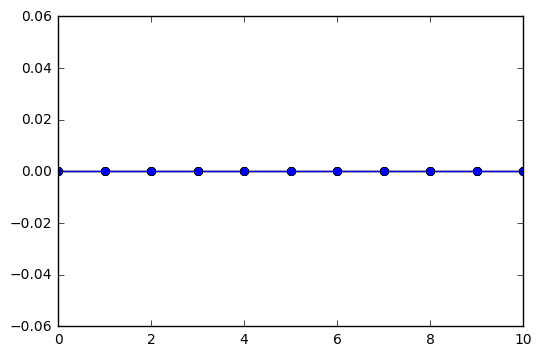

Model saved


In [16]:
local_params = {
  'conv1': ConvParam("conv1", 5, 8),
  'inception1': InceptionParam("inception1", 8, 8),
  'inception2': InceptionParam("inception2", 16, 8),
  'fc1': FullyConnectedParam('fc1', 8),
  'dropout1': DropoutParam('dropout1', 0.5),
  'fc2': FullyConnectedParam('fc2', 10),
  'out': FullyConnectedParam('out', None), # set in train_model
  'base': BaseParam(epochs=1, rate=0.001, batch_size=1)
}

aws_params = {
  'conv1': ConvParam("conv1", 5, 16),
  'inception1': InceptionParam("inception1", 32, 16),
  'inception2': InceptionParam("inception2", 64, 16),
  'fc1': FullyConnectedParam('fc1', 64),
  'dropout1': DropoutParam('dropout1', 0.7),
  'fc2': FullyConnectedParam('fc2', 128),
  'out': FullyConnectedParam('out', None), # set in train_model
  'base': BaseParam(epochs=10, rate=0.001, batch_size=32)
}

param_order = ['conv1', 'inception1', 'inception2', 'fc1', 'dropout1', 'fc2', 'out', 'base']

train_model(local_params, param_order, X_train[0:10], y_train[0:10], X_valid[0:10], y_valid[0:10], X_test[0:10], y_test[0:10])

In [ ]:
ready_for_testing = False
if ready_for_teting:
  with tf.Session(graph = graph) as sess:
      saver.restore(sess, tf.train.latest_checkpoint('.'))

      test_accuracy = evaluate(X_test, y_test, sess)
      print("Test Accuracy = {:.3f}".format(test_accuracy))

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** 
I used the AdamOptamizer for this project. It seemed to work fine, although I did not spend the time to test a different optamizer. My batch size was very small, 4. I am not sure if I just had too many model paramameters or too large of a model but I struggled to fit my model in the GPU with anything larger (8, 16 ect). I tested different epoch sizes and felt like 100 was a good size, although a better method would be to stop training one the validation dataset stops improving. I used the xavier_initializer to initialize the weights and set the initial biases to 0. My learning rate was 0.001. I did not mess with this parameter at all because I assumed a small learning rate was a good way to allow my model to learn. This is something I would play with in the future. 

Other hyperparameters include the depths of different layers, the size of some kernals in my CNNs, and my dropout rate between the two fully connected layers. I stared with dropouts around 0.5 but prograssivly moved it up to 0.8 as I seemed to get better results this way. I chose a first kernal size of 5 because that is what the paper did. From there I think the inception module provides an easy way to guarentee I get good results for different kernal sizes. 

I liked working with the inception module because it created a way for me to have less hypter paraemters to deal with. 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
I definetly user a process of trial and error for this project. I stated with the LeNet5 architicture as a baseline. This was iteration 0. This actually had a very good success rate around 95% on the validation set. I could have continued to tweek the depth parameters of the model and maybe gotten a better score. 

I then read the LeCunn paper and tried to reimpliment thier model. This was a pretty good model. I initally wanted to get rid of the max pooling and add dropout. I wanted to get rid of the max pooling because seems to be falling out of favor. I also wanted to add dropout because this is a good way to prevent over fitting. For this iteration fo the model, I ended up needing to add pooling to reduce my model size. The last part of the LeCunn paper talked about using the results from the first 3 CNN layers in the fuly connected layer. The paper also said this had a significant positive effect on the final result. To me this sounded like an early days inception module so I decided to create a new version with inception modules. 

After reading this [article](https://hacktilldawn.com/2016/09/25/inception-modules-explained-and-implemented/) and looking at the GooLeNet architechture, I decided to replace my middle two CNNs with inception modules. This felt right beause it still used a model about the size of the LeCunn moel but added a more sophisticated inception module. More trial and error is need to decide if that is the right solution. 

From there, I continued to tweak the model hyperparameters through trial and error. 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.